Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

#### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data
#### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [2]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("C:/Users/Prasad_Joshi/OneDrive/Desktop/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('C:/Users/Prasad_Joshi/OneDrive/Desktop/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing
Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset
Define some parameters for the loader:

In [4]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [5]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
Todo, create a code to visualize one instance of all the nine classes present in the dataset

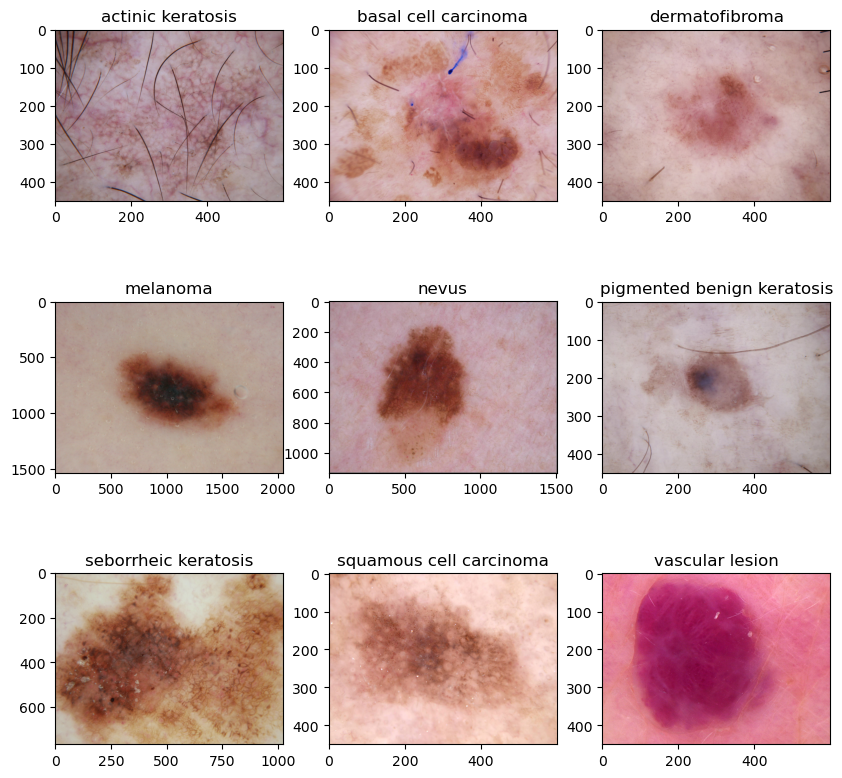

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
# Create the model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

#### Compile the model
Choose an appropirate optimiser and loss function for model training

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

#### Train the model

In [12]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


C:\Users\Prasad_Joshi\anaconda3\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 417s 6s/step - loss: 2.0689 - accuracy: 0.1847 - val_loss: 2.0440 - val_accuracy: 0.1790
Epoch 2/30
56/56 [==============================] - 262s 5s/step - loss: 1.9857 - accuracy: 0.2349 - val_loss: 1.9204 - val_accuracy: 0.2886
Epoch 3/30
56/56 [==============================] - 273s 5s/step - loss: 1.8541 - accuracy: 0.3036 - val_loss: 1.9794 - val_accuracy: 0.2416
Epoch 4/30
56/56 [==============================] - 262s 5s/step - loss: 1.8380 - accuracy: 0.3214 - val_loss: 1.7543 - val_accuracy: 0.3311
Epoch 5/30
56/56 [==============================] - 262s 5s/step - loss: 1.7070 - accuracy: 0.3700 - val_loss: 1.6178 - val_accuracy: 0.4295
Epoch 6/30
56/56 [==============================] - 262s 5s/step - loss: 1.6189 - accuracy: 0.4146 - val_loss: 1.6003 - val_accuracy: 0.4183
Epoch 7/30
56/56 [==============================] - 275s 5s/step - loss: 1.6564 - accuracy: 0.3940 - val_loss: 1.5665 - val_accuracy: 0.4385
Epoch 8/30
56/56 [======

### Visualizing training results

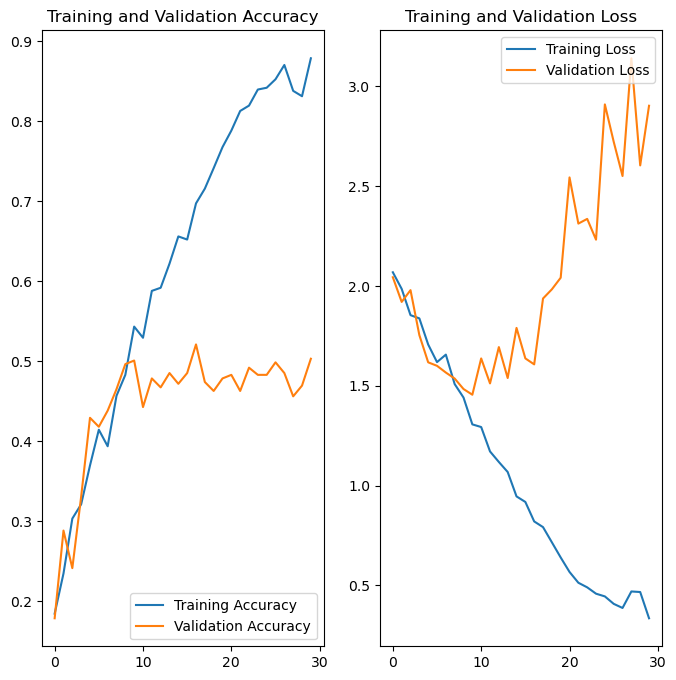

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Finding on the first base model

- The model is overfitting because we can also see difference in loss functions in training & test around the 10-11th epoch

- The accuracy is just around 75-80% because there are enough features to remember the pattern.

- But again, it's too early to comment on the overfitting & underfitting debate

In [14]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

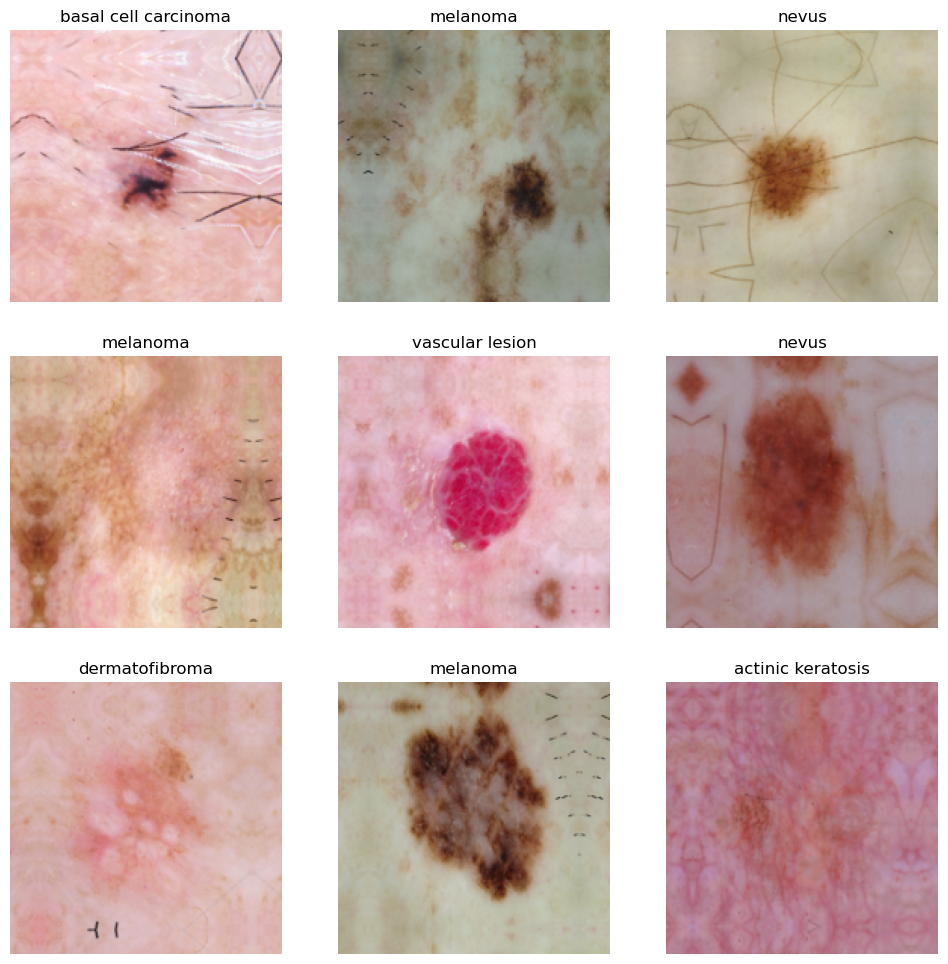

In [15]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Create the model, compile and train the model

In [16]:
#  Dropout layer as there is an evidence of overfitting
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))


### Training the model

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# View the summary of all layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 32)      2432      
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 64)        51264     
                                                      

In [21]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 268s 5s/step - loss: 2.1383 - accuracy: 0.1881 - val_loss: 2.0520 - val_accuracy: 0.1253
Epoch 2/20
56/56 [==============================] - 261s 5s/step - loss: 2.0184 - accuracy: 0.2148 - val_loss: 1.9176 - val_accuracy: 0.3445
Epoch 3/20
56/56 [==============================] - 262s 5s/step - loss: 1.8629 - accuracy: 0.3008 - val_loss: 1.7080 - val_accuracy: 0.3669
Epoch 4/20
56/56 [==============================] - 268s 5s/step - loss: 1.7944 - accuracy: 0.3158 - val_loss: 1.6445 - val_accuracy: 0.3870
Epoch 5/20
56/56 [==============================] - 284s 5s/step - loss: 1.7032 - accuracy: 0.3683 - val_loss: 1.7086 - val_accuracy: 0.4049
Epoch 6/20
56/56 [==============================] - 270s 5s/step - loss: 1.6719 - accuracy: 0.4085 - val_loss: 1.5580 - val_accuracy: 0.4385
Epoch 7/20
56/56 [==============================] - 280s 5s/step - loss: 1.6070 - accuracy: 0.4235 - val_loss: 1.5588 - val_accuracy: 0.4497
Epoch 8/20
56

### Visualizing the results

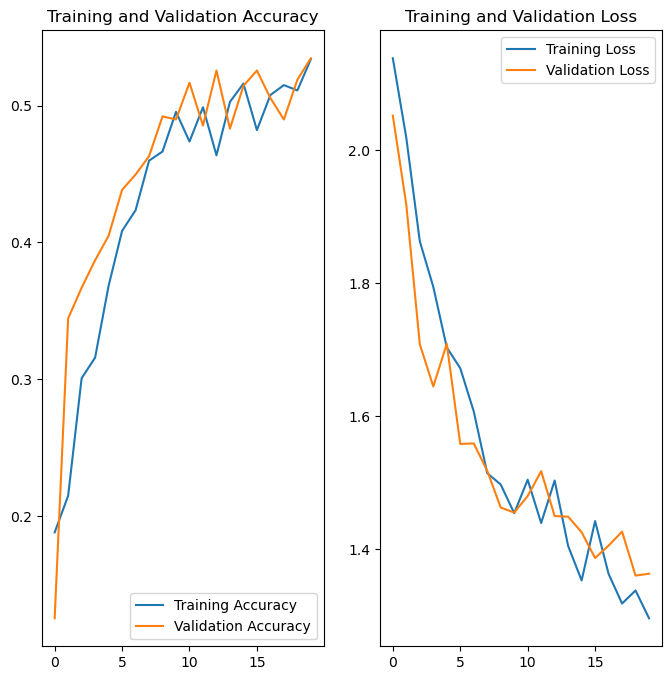

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Finding from Second Model

- There is minor improvement in accuracy

- We can increase the epochs to increase the accuracy 

##### Context: 
Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [76]:
##
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,C:\Users\Prasad_Joshi\OneDrive\Desktop\CNN_ass...,actinic keratosis
1,C:\Users\Prasad_Joshi\OneDrive\Desktop\CNN_ass...,actinic keratosis
2,C:\Users\Prasad_Joshi\OneDrive\Desktop\CNN_ass...,actinic keratosis
3,C:\Users\Prasad_Joshi\OneDrive\Desktop\CNN_ass...,actinic keratosis
4,C:\Users\Prasad_Joshi\OneDrive\Desktop\CNN_ass...,actinic keratosis
...,...,...
2234,C:\Users\Prasad_Joshi\OneDrive\Desktop\CNN_ass...,vascular lesion
2235,C:\Users\Prasad_Joshi\OneDrive\Desktop\CNN_ass...,vascular lesion
2236,C:\Users\Prasad_Joshi\OneDrive\Desktop\CNN_ass...,vascular lesion
2237,C:\Users\Prasad_Joshi\OneDrive\Desktop\CNN_ass...,vascular lesion


In [77]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,C:\Users\Prasad_Joshi\OneDrive\Desktop\CNN_ass...,actinic keratosis
1,C:\Users\Prasad_Joshi\OneDrive\Desktop\CNN_ass...,actinic keratosis
2,C:\Users\Prasad_Joshi\OneDrive\Desktop\CNN_ass...,actinic keratosis
3,C:\Users\Prasad_Joshi\OneDrive\Desktop\CNN_ass...,actinic keratosis
4,C:\Users\Prasad_Joshi\OneDrive\Desktop\CNN_ass...,actinic keratosis
...,...,...
2234,C:\Users\Prasad_Joshi\OneDrive\Desktop\CNN_ass...,vascular lesion
2235,C:\Users\Prasad_Joshi\OneDrive\Desktop\CNN_ass...,vascular lesion
2236,C:\Users\Prasad_Joshi\OneDrive\Desktop\CNN_ass...,vascular lesion
2237,C:\Users\Prasad_Joshi\OneDrive\Desktop\CNN_ass...,vascular lesion


<BarContainer object of 9 artists>

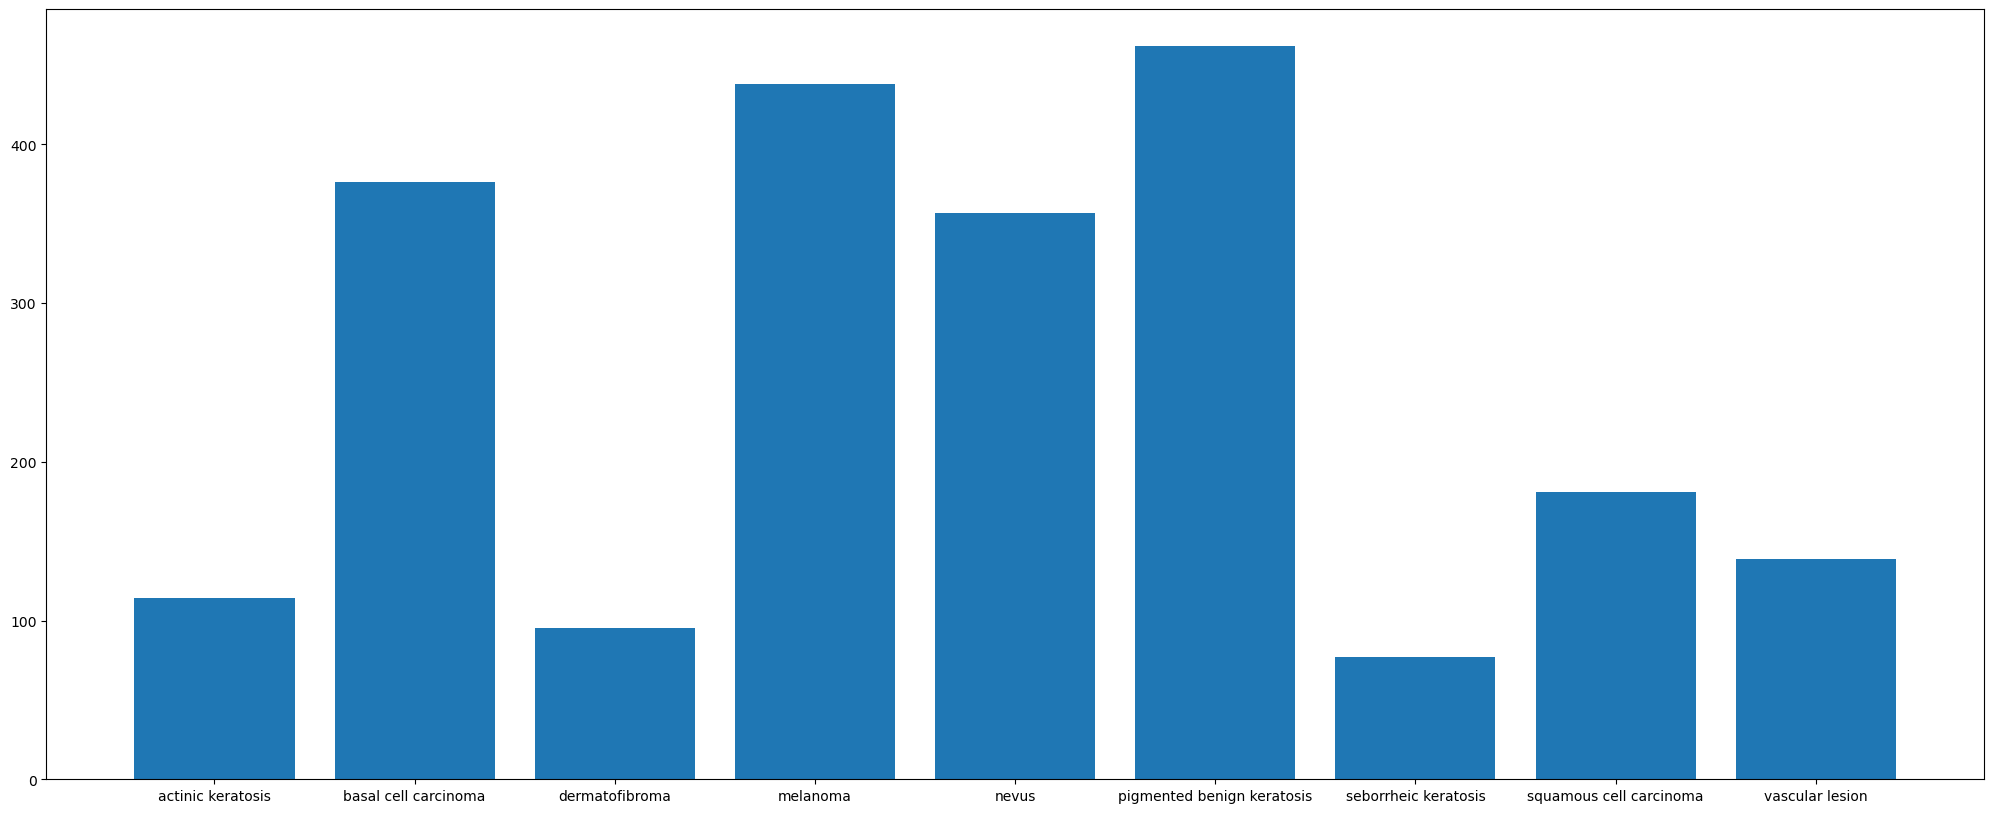

In [78]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

- Which class has the least number of samples?
- Which classes dominate the data in terms proportionate number of samples?

Answer-1 :- squamous cell carcinoma has least number of samples

Answer-2:- actinic keratosis and dermatofibroma have proportionate number of classes. melanoma and pigmented benign keratosis have proprtionate number of classes

In [79]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [80]:
!pip install Augmentor

In [81]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("C:/Users/Prasad_Joshi/OneDrive/Desktop/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 2239 image(s) found.
Output directory set to C:/Users/Prasad_Joshi/OneDrive/Desktop/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1936x1296 at 0x21705E0D730>: 100%|██████████| 500/500 [00:10<00:00, 46.04 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to C:/Users/Prasad_Joshi/OneDrive/Desktop/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=722x542 at 0x2170C1E50A0>: 100%|██████████| 500/500 [00:09<00:00, 51.66 Samples/s]                    


Initialised with 2239 image(s) found.
Output directory set to C:/Users/Prasad_Joshi/OneDrive/Desktop/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x21706015850>: 100%|██████████| 500/500 [00:10<00:00, 46.25 Samples/s]                    


Initialised with 2239 image(s) found.
Output directory set to C:/Users/Prasad_Joshi/OneDrive/Desktop/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x21706128640>: 100%|██████████| 500/500 [00:11<00:00, 44.30 Samples/s]                    


Initialised with 2239 image(s) found.
Output directory set to C:/Users/Prasad_Joshi/OneDrive/Desktop/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x21729D63820>: 100%|██████████| 500/500 [00:13<00:00, 38.08 Samples/s]                   


Initialised with 2239 image(s) found.
Output directory set to C:/Users/Prasad_Joshi/OneDrive/Desktop/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2170601C370>: 100%|██████████| 500/500 [00:14<00:00, 34.45 Samples/s]  


Initialised with 2239 image(s) found.
Output directory set to C:/Users/Prasad_Joshi/OneDrive/Desktop/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x21700BFD430>: 100%|██████████| 500/500 [00:14<00:00, 34.85 Samples/s]                    


Initialised with 2239 image(s) found.
Output directory set to C:/Users/Prasad_Joshi/OneDrive/Desktop/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=2313x1985 at 0x21705FF6A00>: 100%|██████████| 500/500 [00:14<00:00, 34.71 Samples/s]                  


Initialised with 2239 image(s) found.
Output directory set to C:/Users/Prasad_Joshi/OneDrive/Desktop/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x217104A20A0>: 100%|██████████| 500/500 [00:15<00:00, 31.94 Samples/s]  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [82]:
data_dir_train1 = pathlib.Path("C:/Users/Prasad_Joshi/OneDrive/Desktop/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

9000


In [83]:
for i in class_names:
      
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df


,Path,Label
0,C:\Users\Prasad_Joshi\OneDrive\Desktop\CNN_ass...,actinic keratosis
1,C:\Users\Prasad_Joshi\OneDrive\Desktop\CNN_ass...,actinic keratosis
2,C:\Users\Prasad_Joshi\OneDrive\Desktop\CNN_ass...,actinic keratosis
3,C:\Users\Prasad_Joshi\OneDrive\Desktop\CNN_ass...,actinic keratosis
4,C:\Users\Prasad_Joshi\OneDrive\Desktop\CNN_ass...,actinic keratosis
...,...,...
11234,C:\Users\Prasad_Joshi\OneDrive\Desktop\CNN_ass...,vascular lesion
11235,C:\Users\Prasad_Joshi\OneDrive\Desktop\CNN_ass...,vascular lesion
11236,C:\Users\Prasad_Joshi\OneDrive\Desktop\CNN_ass...,vascular lesion
11237,C:\Users\Prasad_Joshi\OneDrive\Desktop\CNN_ass...,vascular lesion


Lets see the distribution of augmented data after adding new images to the original training data.

In [84]:
new_df['Label'].value_counts()

pigmented benign keratosis    2360
melanoma                      2229
basal cell carcinoma          1815
nevus                         1767
squamous cell carcinoma        890
vascular lesion                686
actinic keratosis              593
dermatofibroma                 481
seborrheic keratosis           418
Name: Label, dtype: int64

In [85]:
##Train the model on the data created using Augmentor
batch_size = 32
img_height = 180
img_width = 180

In [86]:
import pathlib
data_dir_train1=pathlib.Path("C:/Users/Prasad_Joshi/OneDrive/Desktop/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

In [87]:
data_dir_train1

WindowsPath('C:/Users/Prasad_Joshi/OneDrive/Desktop/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [88]:
# Create a training dataset
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

2239


In [89]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


data_dir_train1=pathlib.Path("C:/Users/Prasad_Joshi/OneDrive/Desktop/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 10 classes.
Using 8992 files for training.


In [90]:
#Create a validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 10 classes.
Using 2247 files for validation.


In [100]:
#Create your model 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 10
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [101]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train your model

In [104]:
epochs =50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
281/281 [==============================] - 12199s 44s/step - loss: 0.9271 - accuracy: 0.7999 - val_loss: 0.8964 - val_accuracy: 0.8042
Epoch 2/50
281/281 [==============================] - 1283s 5s/step - loss: 0.9065 - accuracy: 0.8000 - val_loss: 0.8736 - val_accuracy: 0.8042
Epoch 3/50
281/281 [==============================] - 1259s 4s/step - loss: 0.8898 - accuracy: 0.7995 - val_loss: 0.8696 - val_accuracy: 0.8042
Epoch 4/50
281/281 [==============================] - 1254s 4s/step - loss: 0.8681 - accuracy: 0.7990 - val_loss: 0.8775 - val_accuracy: 0.8042
Epoch 5/50
281/281 [==============================] - 1254s 4s/step - loss: 0.8596 - accuracy: 0.7994 - val_loss: 0.8330 - val_accuracy: 0.8042
Epoch 6/50
281/281 [==============================] - 1250s 4s/step - loss: 0.8444 - accuracy: 0.7996 - val_loss: 0.8379 - val_accuracy: 0.8046
Epoch 7/50
281/281 [==============================] - 1247s 4s/step - loss: 0.8403 - accuracy: 0.7987 - val_loss: 0.8465 - val_accurac

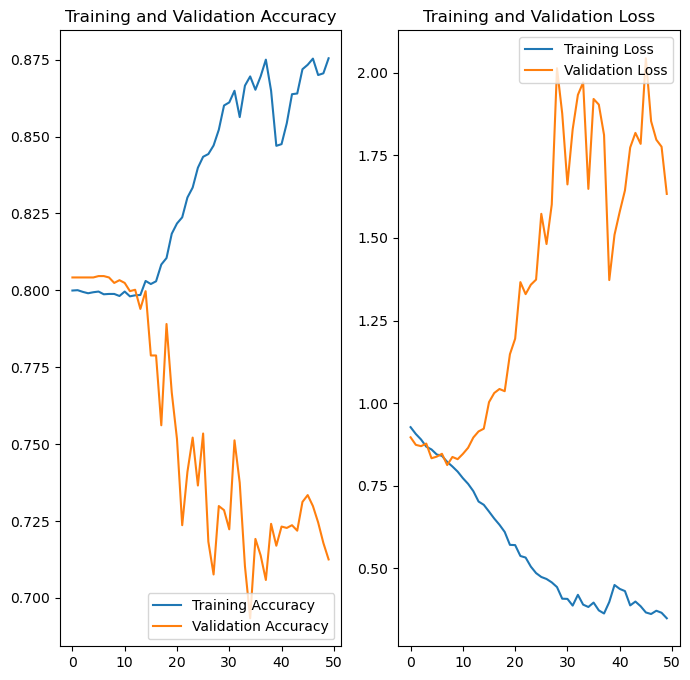

In [105]:
### Visualize the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

-  training data is done by using Augmentor library

- Model is still not fitting good

- The problem  can be solved by add more layer,neurons or adding dropout layers.

- The Model can be further improved by tuning the hyperparameter